In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
carry = pd.read_csv('D:/Projects/Crim_viz/town_of_carry.csv', sep=';', 
                    dtype={'Beat_Number':str, 'Neighborhd_ID':str})

In [3]:
carry.sample(5)

,Crime_Category,Crime_Type,UCR,Map_Reference,Incident_Number,Date_From,newdate,From_Time,Date_To,To_Time,...,phxRecordStatus,PhxCommunity,PhxStatus,Record,OffenseCategory,ViolentProperty,timeframe,domestic,Total_Incidents,year
29748,LARCENY,LARCENY - SHOPLIFTING,23C,P061,18003579,2018-04-26T15:00:00-04:00,2018-04-26,15:00:00,2018-04-26T15:00:00-04:00,15:00:00,...,NaN,No,NaN,84503,Larceny,Part I,Out of Range,N,1,2018.0
71599,ALL OTHER,FRAUD - CREDIT CARD/ATM,26B,NaN,2001759,2002-03-21T22:00:00-05:00,2002-03-21,22:00:00,2002-03-21T22:00:00-05:00,22:00:00,...,NaN,No,NaN,44943,Fraud,Part II,Out of Range,N,1,2002.0
43276,ALL OTHER,FRAUD - WIRE/COMPUTER/OTHER ELECTRONIC MANIPUL...,26E,P120,19008459,2019-09-27T18:25:00-04:00,2019-09-27,18:25:00,2019-09-27T19:10:00-04:00,19:10:00,...,NaN,No,NaN,51967,Fraud,Part II,Last Year,N,1,2019.0
41021,LARCENY,LARCENY - FROM MOTOR VEHICLE,23F,P042,12001128,2012-02-07T21:00:00-05:00,2012-02-07,21:00:00,2012-02-08T07:00:00-05:00,07:00:00,...,NaN,No,NaN,72537,Larceny,Part I,Out of Range,N,1,2012.0
90511,ALL OTHER,SIMPLE PHYSICAL ASSAULT,13B,P036,7005304,2007-10-17T13:00:00-04:00,2007-10-17,13:00:00,2007-10-17T13:05:00-04:00,13:05:00,...,NaN,No,NaN,98958,Simple Assault,Part II,Out of Range,Y,1,2007.0


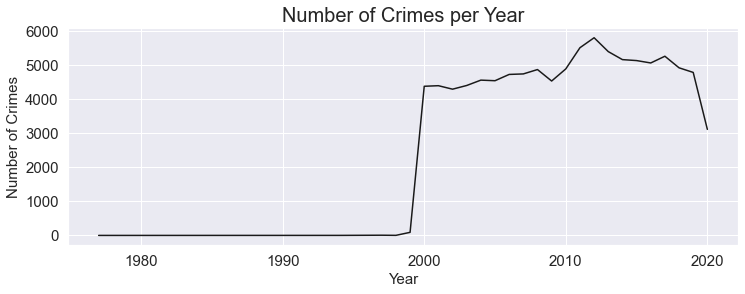

In [4]:
byyear = carry['year'].value_counts().sort_index()
byyear.plot(figsize=(12, 4), color='k', fontsize=15)

plt.title('Number of Crimes per Year', fontsize=20)
plt.ylabel('Number of Crimes', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.show()

In [5]:
carry = carry[carry['year'] >= 2000]

In [6]:
carry.columns

Index(['Crime_Category', 'Crime_Type', 'UCR', 'Map_Reference',
       'Incident_Number', 'Date_From', 'newdate', 'From_Time', 'Date_To',
       'To_Time', 'CrimeDay', 'GeoCode', 'Location_Category', 'District',
       'Beat_Number', 'Location', 'Id', 'Lat', 'Lon', 'Time_To', 'Time_From',
       'chrgcnt', 'Neighborhd_ID', 'Apartment_Complex',
       'Residential_Subdivision', 'Subdivisn_ID', 'activity_date',
       'phxRecordStatus', 'PhxCommunity', 'PhxStatus', 'Record',
       'OffenseCategory', 'ViolentProperty', 'timeframe', 'domestic',
       'Total_Incidents', 'year'],
      dtype='object')

In [7]:
# Aim for date and time together in single datetime

colselect = ['newdate', 'From_Time', 'Lat', 'Lon',\
            'OffenseCategory', 'ViolentProperty', 'domestic', \
            'Total_Incidents']

colnames = ['Date', 'Time', 'Lat', 'Lon', 'Cat', \
            'VP', 'Domestic', 'Tot_Inc']

df = carry[colselect]
df.columns = colnames

df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df.head()

,Time,Lat,Lon,Cat,VP,Domestic,Tot_Inc
Date,,,,,,,
2004-02-14,08:00:00,35.756498,-78.812111,Fraud,Part II,N,1
2005-05-17,09:00:00,35.758153,-78.816455,Fraud,Part II,N,1
2007-01-12,15:04:00,35.761374,-78.820696,Fraud,Part II,N,1
2010-01-01,10:52:00,35.757876,-78.814737,Fraud,Part II,N,1
2001-10-16,08:00:00,35.740426,-78.779495,Fraud,Part II,N,1


In [8]:
df.shape

(100300, 7)

In [9]:
df.dtypes

Time         object
Lat         float64
Lon         float64
Cat          object
VP           object
Domestic     object
Tot_Inc       int64
dtype: object

In [10]:
df.isna().sum()

Time           0
Lat         5973
Lon         5973
Cat         1155
VP          1155
Domestic     978
Tot_Inc        0
dtype: int64

# Exploratory Data Analysis 

### Crime on the Map 

In [11]:
map_carry = plt.imread('Map_carry.png')

map_limits = (df['Lon'].min(), df['Lon'].max(),\
              df['Lat'].min(), df['Lat'].max())
map_limits

(-78.98247117, -78.63903507, 35.644534478000004, 35.895545015)

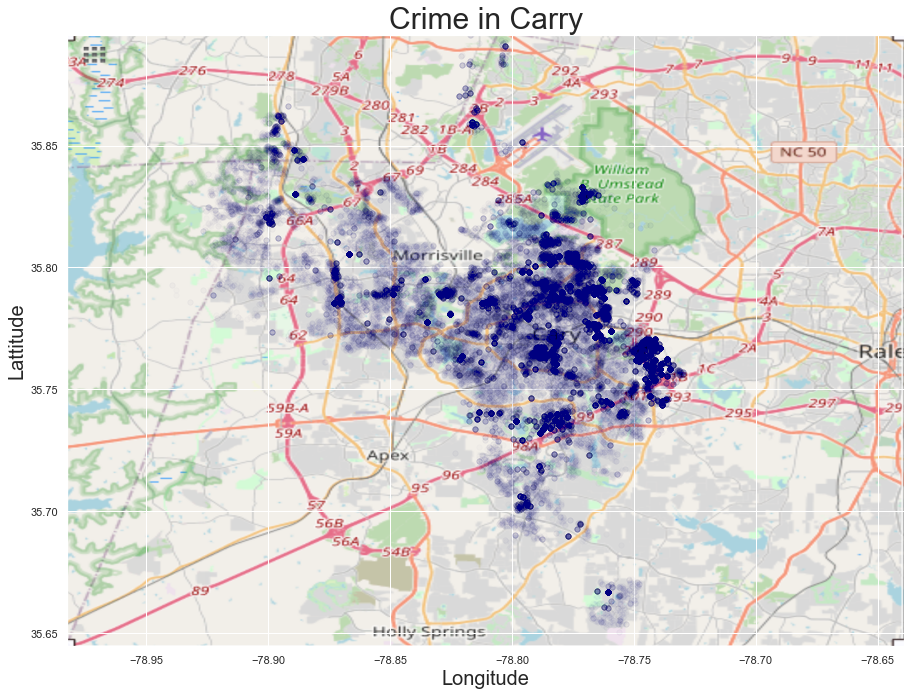

In [12]:
# Analyze by cluster 

fig, ax = plt.subplots(figsize = (15, 20))

ax.scatter(df['Lon'], df['Lat'], zorder=1, alpha= 0.01, c='navy', s=30)
ax.set_xlim(map_limits[0], map_limits[1])
ax.set_ylim(map_limits[2], map_limits[3])

ax.imshow(map_carry, zorder=0, extent = map_limits)
plt.title('Crime in Carry', fontsize=30)
plt.ylabel('Lattitude', fontsize=20)
plt.xlabel('Longitude', fontsize=20)
plt.show()

### Classification of Crimes

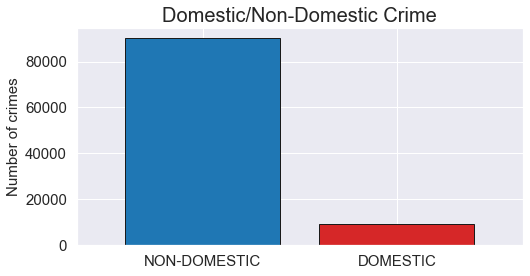

In [13]:
fig, ax = plt.subplots()
df['Domestic'].value_counts().plot(kind='bar', stacked=True, 
                                   color=['tab:blue', 'tab:red'], 
                                   fontsize=15, width=0.8, 
                                   figsize=(8, 4), edgecolor='k')

plt.title('Domestic/Non-Domestic Crime', fontsize=20)
plt.ylabel('Number of crimes', fontsize=15)
ax.set_xticklabels(('NON-DOMESTIC', 'DOMESTIC'), rotation=0)
plt.show()

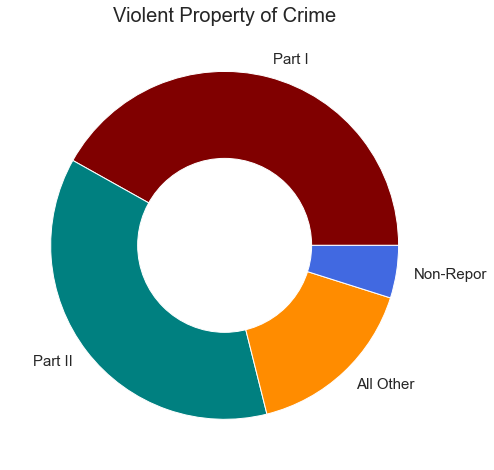

In [14]:
byvp = df['VP'].value_counts()

clrnames = ['maroon', 'teal', 'darkorange', 'royalblue']
byvp.plot(kind='pie', figsize=(8, 8), ylabel='', 
           fontsize=15, colors=clrnames, shadow=False, 
          labeldistance=1.1, legend=False)

my_circle = plt.Circle((0,0), 0.5, color='white')
plt.gcf().gca().add_artist(my_circle)

plt.title('Violent Property of Crime', fontsize=20)
plt.show()

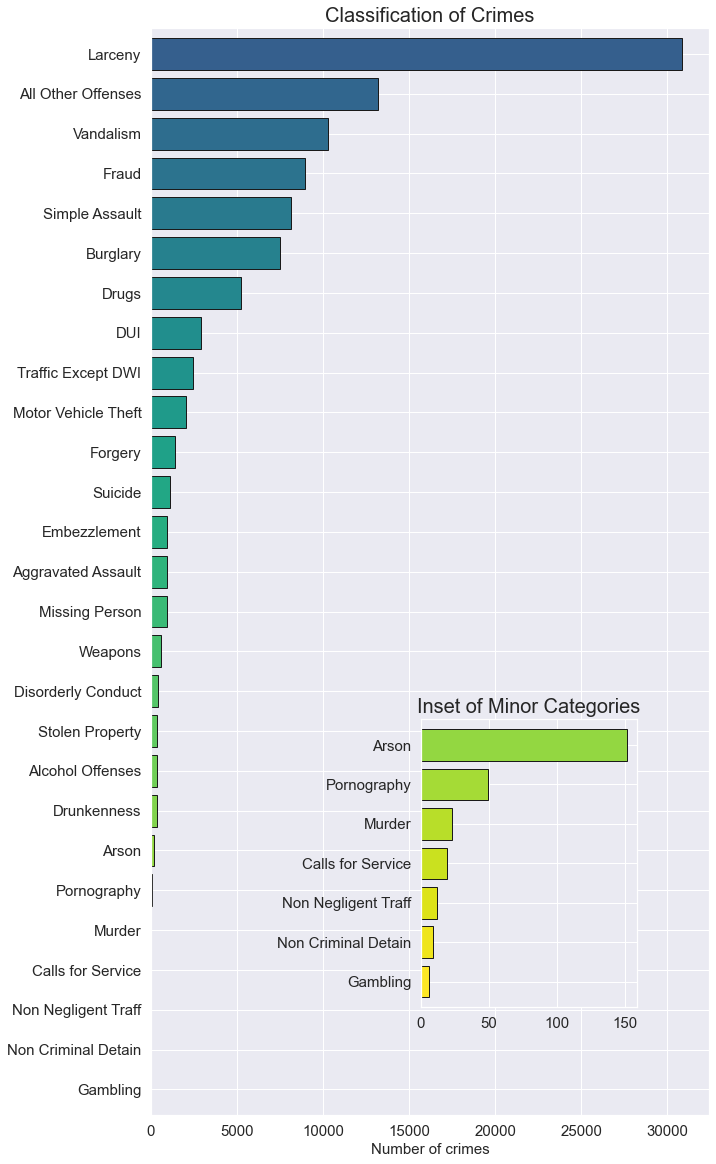

In [15]:
bycat = df['Cat'].value_counts().sort_values()
color = mpl.cm.viridis_r(np.linspace(0, 0.7, len(bycat)))

fig, ax1 = plt.subplots()
bycat.plot(kind='barh', color=color, fontsize=15, 
           figsize=(10, 20), width=0.8, edgecolor='k', ax=ax1)

plt.title('Classification of Crimes', fontsize=20)
plt.xlabel('Number of crimes', fontsize=15)

ax2 = fig.add_axes([0.5, 0.2, 0.3, 0.2])
bycat[:7].plot(kind='barh', color=color, fontsize=15, 
            width=0.8, edgecolor='k', ax=ax2)

plt.title('Inset of Minor Categories', fontsize=20)
plt.show()

# Time Series Analysis 

In [16]:
ts = df[['Tot_Inc']]
ts.head()

,Tot_Inc
Date,
2004-02-14,1
2005-05-17,1
2007-01-12,1
2010-01-01,1
2001-10-16,1


In [17]:
def by_select(by='Year', last=0, dif=False):    
    data = ts.resample(by[0]).sum()[-last:]
    data = [data.diff()[1:] if dif else data][0]
    pre = ['Difference of ' if dif else ''][0]
    return data, pre

In [18]:
def ts_plot(by='Year', last=0, lwd=1.5, dif=False):

    data, pre = by_select(by, last, dif)
    
    data.plot(kind='line', figsize=(12, 3), color='k', 
              legend=False, fontsize=15, linewidth=lwd)
        
    plt.title(pre + 'Number of Crimes Aggrigated by {}'.format(by), 
              fontsize=20)
    plt.ylabel(pre + 'Number of Crimes', fontsize=15)
    plt.xlabel('Time Period', fontsize=15)
    plt.show()

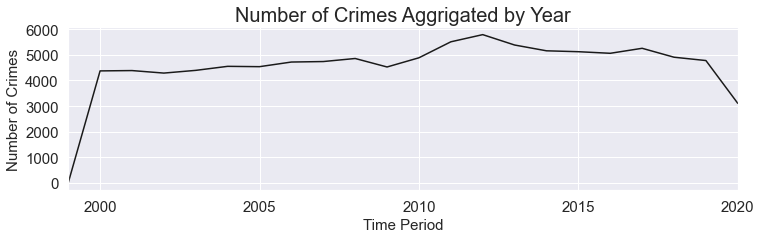

In [19]:
ts_plot()

### Periodicity of the Crime: Aggrigate 

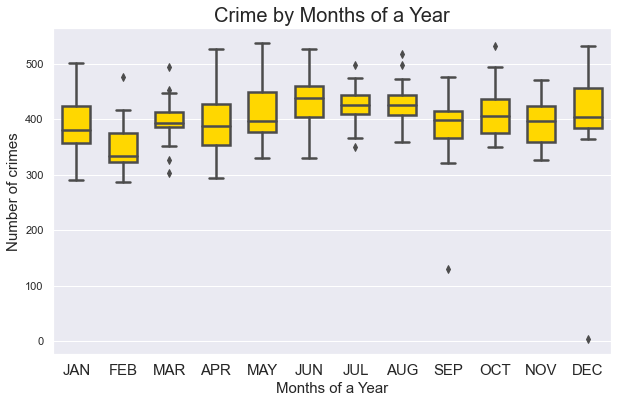

In [20]:
bymonth = ts.resample('M').sum()
bymonth['MOY'] = bymonth.index.month
moy = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',\
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

fig, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x = 'MOY', y = 'Tot_Inc', data = bymonth, 
                  width=0.6, linewidth=2.5, color='gold', 
                  saturation=1)

plt.title('Crime by Months of a Year', fontsize=20)
plt.ylabel('Number of crimes', fontsize=15)
plt.xlabel('Months of a Year', fontsize=15)
ax.set_xticklabels(moy, rotation=0, fontsize=15)
plt.show()

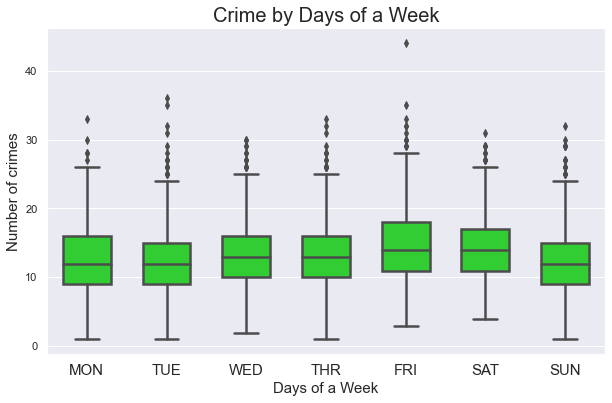

In [21]:
byday = ts.resample('D').sum()
byday['DOW'] = byday.index.dayofweek
dow = ['MON', 'TUE', 'WED', 'THR', 'FRI', 'SAT', 'SUN']

fig, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x = 'DOW', y = 'Tot_Inc', data = byday, 
                  width=0.6, linewidth=2.5, color='limegreen', 
                  saturation=1)

plt.title('Crime by Days of a Week', fontsize=20)
plt.ylabel('Number of crimes', fontsize=15)
plt.xlabel('Days of a Week', fontsize=15)
ax.set_xticklabels(dow, rotation=0, fontsize=15)
plt.show()

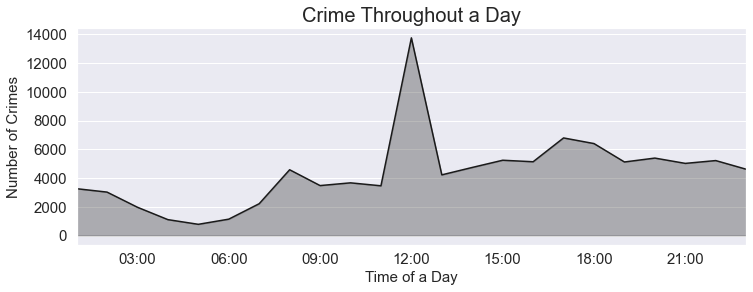

In [22]:
bytime = df[['Time', 'Tot_Inc']].set_index('Time')
bytime.index = pd.to_datetime(bytime.index)
bytime = bytime.resample('60min').sum()

bytime.plot(kind='line', legend=False, figsize=(12, 4), 
            color='k', fontsize=15)
plt.fill_between(bytime.index, bytime['Tot_Inc'], alpha=0.3, color='k')

plt.title('Crime Throughout a Day', fontsize=20)
plt.ylabel('Number of Crimes', fontsize=15)
plt.xlabel('Time of a Day', fontsize=15)
plt.show()

### Periodicity of the Crime: Time Series 

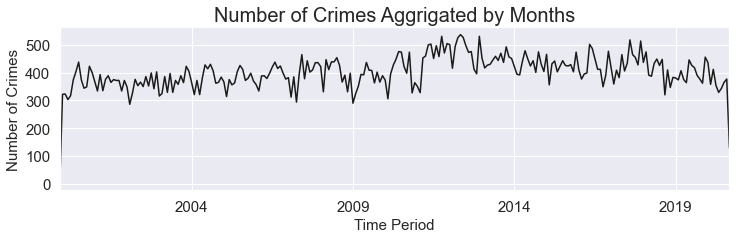

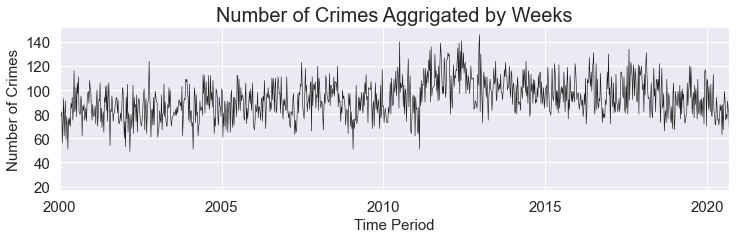

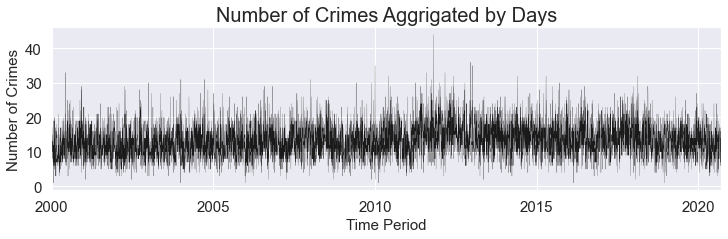

In [23]:
ts_plot('Months')
ts_plot('Weeks', lwd=0.6)
ts_plot('Days', lwd=0.2)

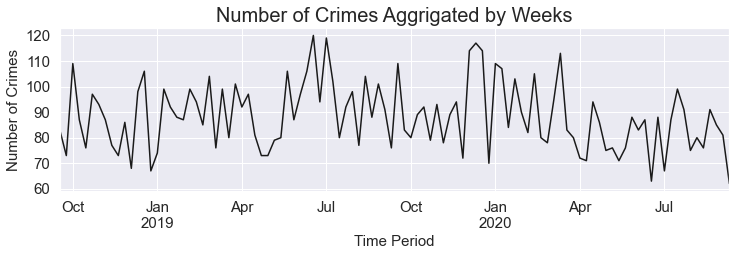

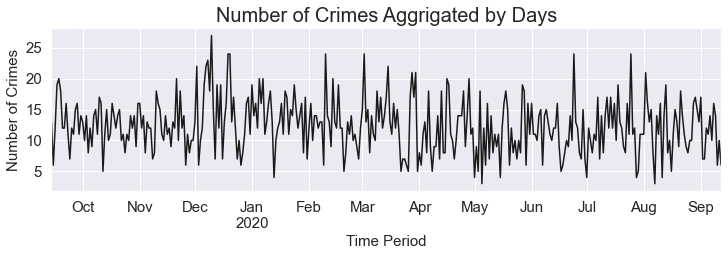

In [24]:
ts_plot('Weeks', last=104)
ts_plot('Days', last=365)